# Medical_Data_Visualizer Project

## Introduction

The *Medical Data Visualizer* is an exploratory data analysis (EDA) project that investigates a dataset of anonymous patients' medical information, and explores the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

The objective of the project is to **visualize and make calculations from the medical examination data using NumPy, pandas, matplotlib, and seaborn**.

### Data description
The dataset is a record of anonymous patient's medical information collected during medical examinations. The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. The dataset will be used to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

The table below summarizes the documentation for the dataset.

<div style="display: inline-block">

|Feature|Variable Type|Variable|Value Type|
|:---:|:---:|:---:|:---:|
|Age|Objective Feature|`age`|int (days)|
|Height|Objective Feature|`height`|int (cm)|
|Weight|Objective Feature|`weight`|float (kg)|
|Gender|Objective Feature|`gender`|categorical code|
|Systolic blood pressure|Examination Feature|`ap_hi`|int|
|Diastolic blood pressure|Examination Feature|`ap_lo`|int|
|Cholesterol|Examination Feature|`cholesterol`|1: normal, <br>2: above normal, <br>3: well above normal|
|Glucose|Examination Feature|`gluc`|1: normal, <br>2: above normal, <br>3: well above normal|
|Smoking|Subjective Feature|`smoke`|binary|
|Alcohol intake|Subjective Feature|`alco`|binary|
|Physical activity|Subjective Feature|`active`|binary|
|Presence or absence of<br> cardiovascular disease|Target Variable|`cardio`|binary|

</div>

### Acknowledgements
This project was previously completed as part of the requirements for the **Data Analysis with Python** certification from [freeCodeCamp.com](https://www.freecodecamp.org/learn/data-analysis-with-python/).

The dataset descriptions and project instructions below are adapted directly from the [freecodecamp project page](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer).

## Project Code

### Imports

Import the required Python libraries, and then the medical dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import medical data
df = pd.read_csv("medical_examination.csv")

### Data Cleaning and Preprocessing

In [3]:
# Data cleaning
df = df[
    (df.ap_lo <= df.ap_hi) # ignore diastolic pressure greater than systolic 
    & (df['height'] >= df['height'].quantile(0.025)) # ignore heights less than 2.5th quantile
    & (df['weight'] <= df['height'].quantile(0.975)) # ignore heights greater than 97.5th quantile
    & (df['weight'] >= df['weight'].quantile(0.025)) # ignore weights less than 2.5th quantile
    & (df['weight'] <= df['weight'].quantile(0.975)) # ignore weights greater than 97.5th quantile
    ]

### Data Analysis

In [4]:
# Add "Overweight" column to dataframe
bmi = (df.weight / (df.height/100)**2).tolist() # calculate bmi first
df = df.rename(columns={'sex':'gender'})
df['overweight'] = np.array([1 if x>25 else 0 for x in bmi]) # map overweight based on bmi

In [5]:
# Normalize 'cholesterol' and 'glucose' columns
cols = ['cholesterol','gluc']
for col in cols: # use list comprehension to map the normalized values
    df[col] = np.array([0 if x==1 else 1 for x in df[col].tolist()])

In [6]:
# Categorical plot function
def draw_cat_plot(df):
    # Create a category frequency table using pandas `melt()` and `groupby()` methods
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])
    df_cat = df_cat.groupby(['cardio','variable','value']).value_counts().reset_index()

    # Create categorical plot
    sns.set(font_scale=0.8, style='whitegrid')
    fig = sns.catplot(x='variable',y='count', data=df_cat, kind='bar', hue='value', col = 'cardio', height=3, aspect=1.5)
    fig.set(ylabel='Total', xlabel="Patients' Health Variables")
    
    fig.savefig('catplot.png')

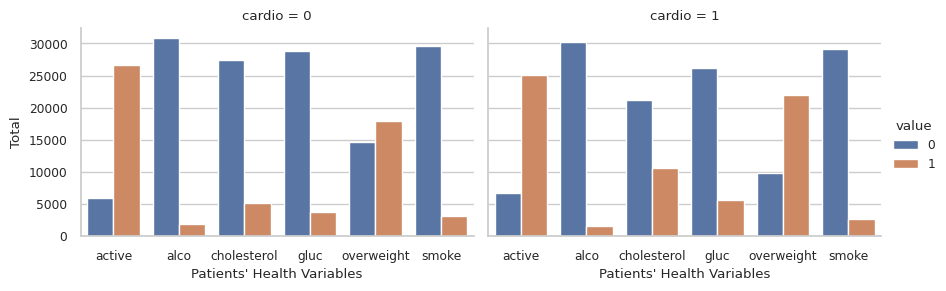

In [7]:
draw_cat_plot(df)

In [8]:
# Heatmap plot function
def draw_heatmap(df):
    # Generate the correlation matrix and plot mask
    corr = round(df.corr(), 3) # Round values to 3 s.f.
    mask = np.triu(np.ones_like(corr, dtype=bool)) # Create an upper triangle mask 

    # Create heatmap plot
    sns.set(font_scale=0.8)
    sns.set_style('white', {'xtick.bottom':True, 'ytick.left':True})
    fig, axs = plt.subplots(figsize=(6,6))
    
    axs = sns.heatmap(corr, mask=mask, annot=True, annot_kws={'size': 7}, fmt='.1f', 
                      cmap='seismic', center=0, vmin=-1, vmax=1, square=True,
                      cbar_kws={'shrink': 0.6, 'label': 'Correlation Coefficient'})
    
    axs.tick_params(axis='x', labelsize=8, rotation=-45)
    axs.tick_params(axis='y', labelsize=8)
   
    fig.savefig('heatmap.png')

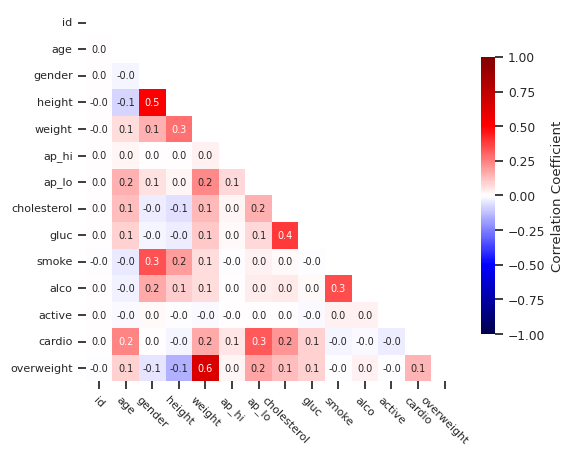

In [9]:
draw_heatmap(df)